In [1]:
%matplotlib inline
# Importamos qiskit standard
from qiskit import QuantumRegister, ClassicalRegister, execute
from qiskit import QuantumCircuit, execute, Aer

from qiskit.tools.jupyter import *
from qiskit.visualization import plot_state_city
import matplotlib.pyplot as plt


import numpy as np

In [9]:
def real_map(value, leftMin, leftMax, rightMin, rightMax):
    # Maps one range to another
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)

In [10]:
def QRandom(a, b, qubits=2):
    
    ### Generador de números aleatorios.
    
    q = QuantumRegister(qubits, 'q')
    
    ### Solo crea la pila de registros, como en un procesador clásico.
    ### En este caso nuestro registro es igual a 2.
    
    
    
    circ = QuantumCircuit(q)
    
    #Creamos el circuito cuántico con dos registros
    
    c0 = ClassicalRegister(2, 'c0')
    
    circ.add_register(c0)

    for i in range(qubits):   ##hacemos un bucle de 2 en este caso pero dependeria de lo que hicieramos.
        circ.h(q[i])       #aplicamos una puerta de hadarmard


    for i in range(qubits):
        circ.measure(q[i], c0)

    #circ.draw(output='mpl')


    backend = Aer.get_backend('statevector_simulator')
    #statevector_simulator= vector de estado
    #El backend más común en Qiskit Aer es el statevector_simulator. 
    
    job = execute(circ, backend)
    
    
    
    #Este simulador devuelve el estado cuántico, que es un vector complejo de dimensiones.    
    #dónde es la cantidad de qubits (así que tenga cuidado al usar esto, ya que rápidamente 
    #se volverá demasiado grande para ejecutarse en su máquina).
    
    
    #print(job.status())
    result = job.result()
    
    output = result.get_statevector(circ, decimals=5)
    #Coger valor del vector de estado con una precisión de 5 
    
    n1 = 0
    n2 = 0
    n3 = 0.
    
    
    for i in range( output.size ):
        if abs(output[i]) != 0:
            #print(i, output[i])
            n1 = i
            n2 = np.real(output[i])
            n3 = np.imag(output[i])
    
    
    y = real_map(n1+n2+n3, -qubits, len(output)-1+qubits, a, b) 
    plot_state_city(output)
    return y

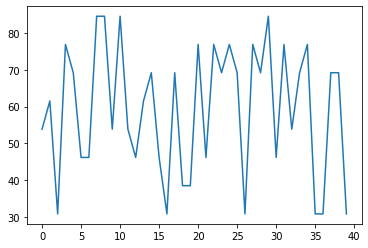

In [7]:
x = []
for i in range(40):
    x.append( QRandom(0, 100,3) )

plt.plot(x)